In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

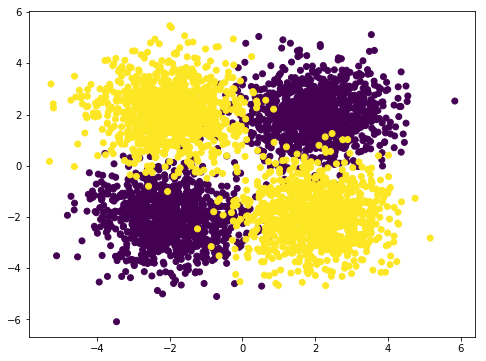

In [2]:
data = pd.read_csv("xor.csv")

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y)

In [3]:
N, D = X.shape

PHI = np.column_stack((np.ones((N,1)), X, X[:,0]*X[:,1]))

In [4]:
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p):
    return -np.sum(y*np.log(p) + (1 - y)*np.log(1 - p))

def accuracy(y, p):
    return np.mean(y == np.round(p))

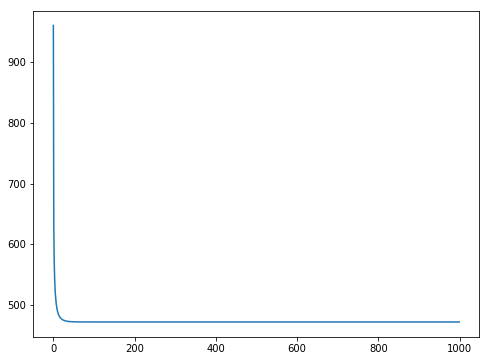

In [6]:
w = np.random.randn(PHI.shape[1])

J = []
eta = 3e-4
epochs = int(1e3)

for t in range(epochs):
    p = sigmoid(PHI.dot(w))
    J.append(cross_entropy(y, p))
    w -= eta*PHI.T.dot(p - y)
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [7]:
print("Accuracy: {}".format(accuracy(y,p)))

Accuracy: 0.9565


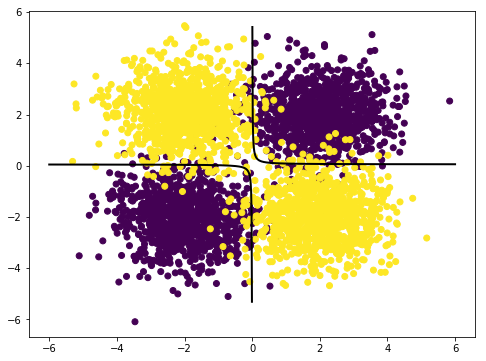

In [12]:
x1 = np.linspace(-6, 6, 1000)
x2 = -(w[0]/(w[2]+w[3]))*(1/x1) - (w[1]/(w[2] + w[3]))

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(x1[:len(x1)//2], x2[:len(x2)//2], color = "black", linewidth = 2)
plt.plot(x1[len(x1)//2:], x2[len(x2)//2:], color = "black", linewidth = 2)

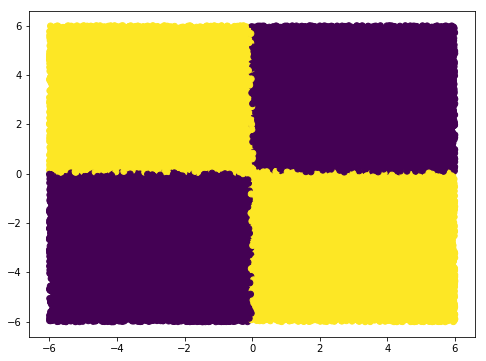

In [17]:
X_vis = np.random.uniform(-6, 6, (10*N, D))

PHI_vis = np.column_stack((np.ones((10*N, 1)), X_vis, X_vis[:,0]*X_vis[:,1]))

p_vis = sigmoid(PHI_vis.dot(w))

plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,0], X_vis[:,1], c = np.round(p_vis))